In [5]:
ler_anbima_curva_credito <- function(data, plot = F){
  stopifnot(is(data, "Date"), length(data)==1)
  pacotes <- c("httr", "xml2", "XML", "ggthemes", "tidyverse")
  for(i in pacotes){
    suppressPackageStartupMessages(library(i, character.only = T))
  }
  url <- "https://www.anbima.com.br/informacoes/curvas-debentures/CD-down.asp"
  tipo <- "form"
  idioma <- "PT"
  saida <- "csv"
  r <- POST(url = url, encode = tipo, body = list(Dt_ref = format(data, "%d/%m/%Y"),
                                                  Idioma = idioma,
                                                  saida = saida))
  txt <- content(r, encoding = "UTF-8")
  txt <- rawToChar(txt)
  dados <- read.csv2(text = txt, header = T, stringsAsFactors = F, skip = 1)
  dados$Data <- data
  dados[,c(2:4)] <- dados[,c(2:4)]/100
  dados <- dados%>%
    gather(key = "Rating", value = "Spread", -c(Data, Vertices))
  if(isFALSE(plot)){
    return(dados) 
  }else{
    ggplot(dados, aes(x = Vertices))+
      geom_line(aes(y = AAA, colour = "AAA"))+
      geom_line(aes(y = AA, colour = "AA"))+
      geom_line(aes(y = A, colour = "A"))+
      scale_colour_manual("Rating", values = c("AAA" = "red",
                                               "AA" = "blue",
                                               "A" = "green"))+
      labs(x = "Anos", y = "Spread", title = "Curva de crédito",
           subtitle = format(data, "%d/%m/%Y"), caption = "Fonte:Anbima \n 
           Elaboração: Gabriel Matte")+
      scale_y_continuous(labels = scales::percent)+
      theme_economist()
  }
}

In [6]:
ler_multi <- function(dates){
  a <- replicate(length(dates), list())
  for(i in 1:length(a)){
    a[[i]] <- ler_anbima_curva_credito(dates[i], F)
  }
  b <- a[[1]]
  for(i in 2:length(a)){
    b <- rbind(b,a[[i]])
  }
  b <- b %>%
    gather(key = "Rating", value = "Spread", -c(Data, Vertices))
  return(b)
}

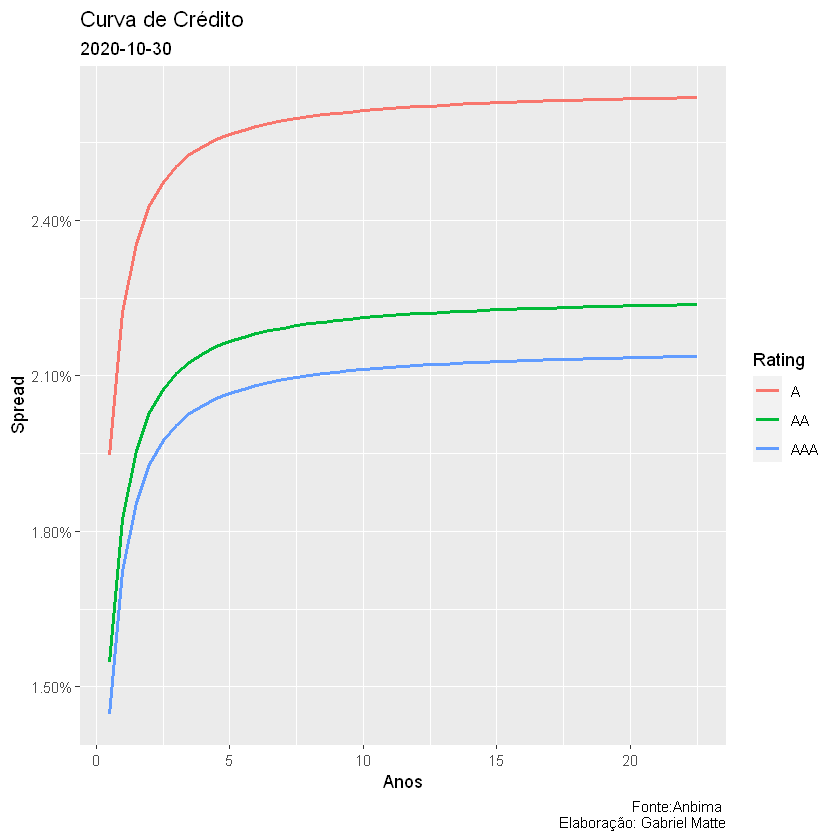

In [7]:
a <- ler_anbima_curva_credito(as.Date("2020-10-30"))
ggplot(a, aes(x = Vertices, y = Spread, col = Rating))+
  geom_line(size = 1)+
  labs(x = "Anos", y = "Spread",
       title = "Curva de Crédito",
       subtitle = "2020-10-30",
       caption = "Fonte:Anbima \n Elaboração: Gabriel Matte")+
  scale_y_continuous(labels = scales::percent)